In [1]:
!pip install gymnasium
!pip install wandb
!pip install swig "gymnasium[mujoco]"

  Using cached swig-4.2.1.post0-py2.py3-none-win_amd64.whl.metadata (3.5 kB)
  Using cached imageio-2.36.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached glfw-2.7.0-py2.py27.py3.py30.py31.py32.py33.py34.py35.py36.py37.py38-none-win_amd64.whl.metadata (5.4 kB)
  Using cached PyOpenGL-3.1.7-py3-none-any.whl.metadata (3.2 kB)
Using cached swig-4.2.1.post0-py2.py3-none-win_amd64.whl (2.5 MB)
Using cached imageio-2.36.0-py3-none-any.whl (315 kB)
   ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
   --------------------------------- ------ 3.9/4.7 MB 19.6 MB/s eta 0:00:01
   ---------------------------------------- 4.7/4.7 MB 17.7 MB/s eta 0:00:00
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
Using cached glfw-2.7.0-py2.py27.py3.py30.py31.py32.py33.py34.py35.py36.py37.py38-none-win_amd64.whl (493 kB)
Using cached PyOpenGL-3.1.7-py3-none-any.whl (2.4 MB)


In [2]:
!pip install swig "gymnasium[box2d]"

  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp39-cp39-win_amd64.whl size=451077 sha256=e56cfc87d238722d180b8ea9fc4070629ca2dd7bc8098cf412cb90c4ff9fc7dc
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\a4\c2\c1\076651c394f05fe60990cd85616c2d95bc1619aa113f559d7d
Successfully built box2d-py


In [6]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gymnasium as gym
from tqdm import tqdm
import os
from dotenv import load_dotenv

## Running Trainer A3C CartPole V1

Training started...


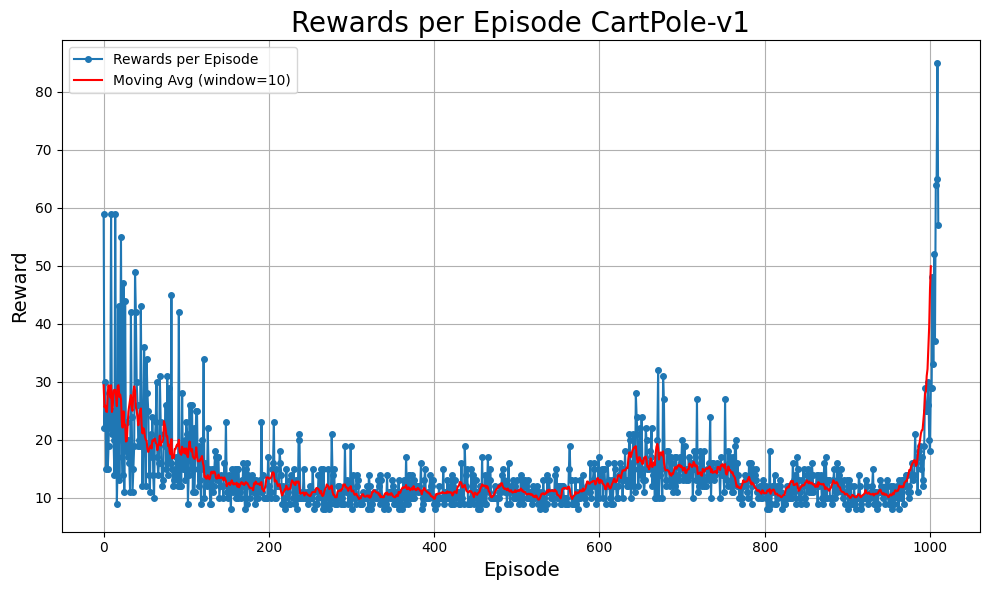

<ListProxy object, typeid 'list' at 0x207908df5e0>

In [ ]:
%matplotlib inline
from a3c_cartpole import train_a3c

train_a3c(lr=1e-3, env_id='CartPole-v1', n_actions=2, n_episodes=1000, use_wandb=False, C=5, grad_clip=1)

## Running Trainer Lunar Lander

Training started...


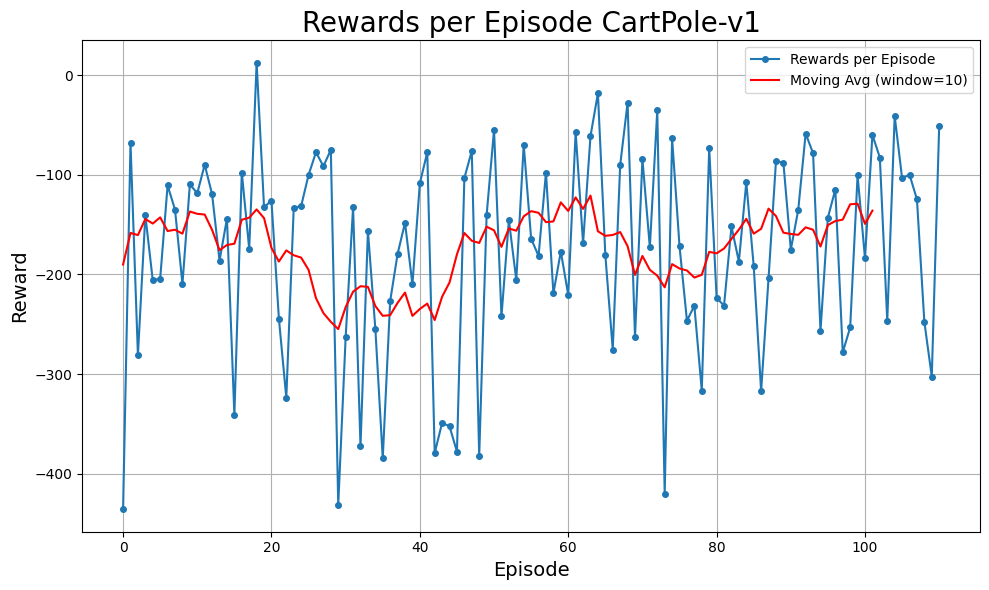

<ListProxy object, typeid 'list' at 0x2bb1baf6ca0>

In [5]:
# Code for Lunar Lander 

%matplotlib inline

from a3c_cartpole import train_a3c

train_a3c(lr=1e-4, env_id='LunarLander-v3', input_dims=[8], n_actions=4, n_episodes=100, use_wandb=False)

In [4]:
def rewards_per_episode_plot_2(rewards_per_ep, environment_type, epsilons=None, window_size=10):
    """
    Plots rewards per episode with optional smoothing.
    
    Args:
        rewards_per_ep (dict): A dictionary where keys are episodes and values are rewards.
        environment_type (str): The type of environment (for plot title).
        epsilons (list, optional): Epsilon values per episode, if you'd like to include them in the plot. Default is None.
        window_size (int, optional): The window size for moving average smoothing. Default is 10.
    """
    episodes = np.array(list(rewards_per_ep.keys())).flatten()
    rewards = np.array(list(rewards_per_ep.values())).flatten()

    plt.figure(figsize=(10, 6))
    plt.plot(episodes, rewards, marker='o', linestyle='-', markersize=4, label='Rewards per Episode')

    # Moving average for smoothing
    if window_size > 1:
        moving_avg = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
        plt.plot(episodes[:len(moving_avg)], moving_avg, color='r', label=f'Moving Avg (window={window_size})')

    plt.title(f'Rewards per Episode {environment_type}', fontsize=20)
    plt.xlabel('Episode', fontsize=14)
    plt.ylabel('Reward', fontsize=14)
    plt.grid(True)
    
    # Include epsilon plot if provided
    if epsilons:
        ax2 = plt.gca().twinx()
        ax2.plot(episodes, epsilons, color='g', alpha=0.6, linestyle='--', label='Epsilon')
        ax2.set_ylabel('Epsilon', fontsize=14)
        ax2.tick_params(axis='y', labelsize=12)

    plt.legend()
    plt.tight_layout()
    plt.show()
    return plt

## Greedy Agent Evaluation

### Evaluating CartPole Environment

d:\RL_Ass\RL-Assignment-3\a3c_cartpole.py:297: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = T.load(model_path)
Testing Progress: 100%|██████████| 100/100 [00:00<00:

{0: 12.0, 1: 11.0, 2: 11.0, 3: 11.0, 4: 9.0, 5: 9.0, 6: 9.0, 7: 9.0, 8: 10.0, 9: 10.0, 10: 10.0, 11: 10.0, 12: 11.0, 13: 10.0, 14: 11.0, 15: 11.0, 16: 9.0, 17: 11.0, 18: 9.0, 19: 9.0, 20: 10.0, 21: 11.0, 22: 11.0, 23: 11.0, 24: 10.0, 25: 10.0, 26: 9.0, 27: 11.0, 28: 9.0, 29: 10.0, 30: 9.0, 31: 11.0, 32: 9.0, 33: 8.0, 34: 10.0, 35: 11.0, 36: 9.0, 37: 9.0, 38: 9.0, 39: 8.0, 40: 11.0, 41: 9.0, 42: 9.0, 43: 9.0, 44: 11.0, 45: 9.0, 46: 10.0, 47: 11.0, 48: 12.0, 49: 11.0, 50: 9.0, 51: 11.0, 52: 10.0, 53: 10.0, 54: 11.0, 55: 10.0, 56: 11.0, 57: 10.0, 58: 9.0, 59: 9.0, 60: 10.0, 61: 10.0, 62: 8.0, 63: 11.0, 64: 10.0, 65: 9.0, 66: 10.0, 67: 8.0, 68: 9.0, 69: 11.0, 70: 9.0, 71: 9.0, 72: 10.0, 73: 9.0, 74: 10.0, 75: 8.0, 76: 11.0, 77: 8.0, 78: 10.0, 79: 9.0, 80: 11.0, 81: 9.0, 82: 11.0, 83: 11.0, 84: 9.0, 85: 9.0, 86: 10.0, 87: 9.0, 88: 11.0, 89: 9.0, 90: 10.0, 91: 11.0, 92: 10.0, 93: 10.0, 94: 10.0, 95: 9.0, 96: 10.0, 97: 11.0, 98: 9.0, 99: 10.0}
Average Reward over 100 episodes: 9.87
{0: 12.0, 

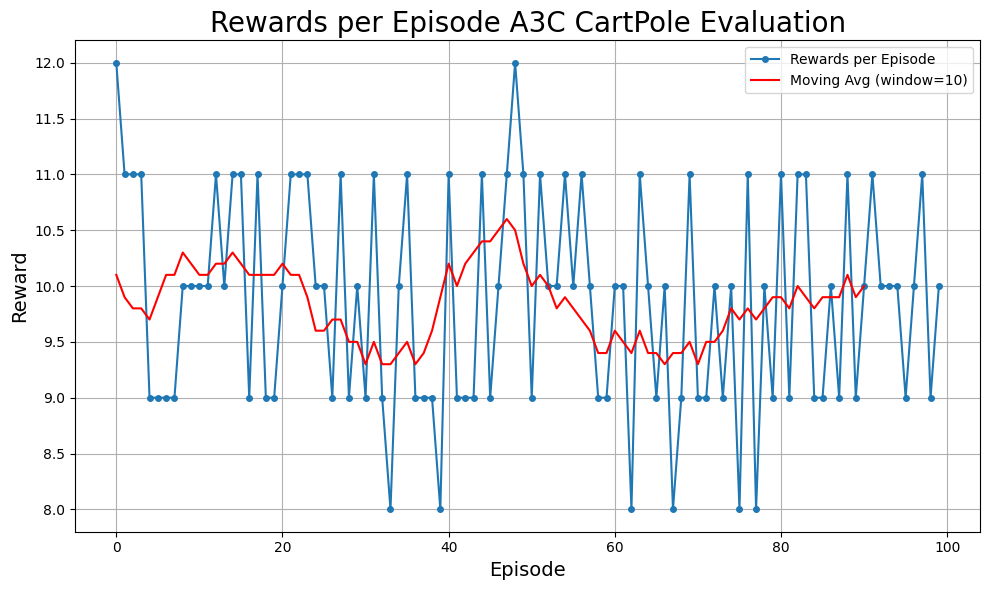

<module 'matplotlib.pyplot' from 'c:\\Users\\ASUS\\miniconda3\\envs\\new_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [7]:
from a3c_cartpole import greedy_agent_a3c

model_path = 'a3c_models/a3c_model_CartPole-v1.pth'
env_id = 'CartPole-v1'
avg_reward, rewards_per_ep = greedy_agent_a3c(model_path, env_id)
print(f"Average Reward over {len(rewards_per_ep)} episodes: {avg_reward}")

print(rewards_per_ep)
# Plot results
rewards_per_episode_plot_2(rewards_per_ep, 'A3C CartPole Evaluation')

c:\Users\ASUS\miniconda3\envs\new_env\lib\site-packages\gymnasium\envs\registration.py:525: UserWarning: WARN: Using the latest versioned environment `LunarLander-v3` instead of the unversioned environment `LunarLander`.
  logger.warn(
Testing Progress: 100%|██████████| 100/100 [00:03<00:00, 26.31Episode/s]


{0: -639.6437022990491, 1: -597.4543756579653, 2: -927.8703237604582, 3: -752.7609977346, 4: -682.6230250283139, 5: -536.3745183450103, 6: -1325.9726560371114, 7: -660.8821987943365, 8: -291.9878885888004, 9: -775.0051673963931, 10: -816.9545350609203, 11: -562.0958583405675, 12: -1764.4315739742335, 13: -549.4176727618237, 14: -1321.5791907803325, 15: -323.58357898262955, 16: -341.36434209096296, 17: -619.6217801336484, 18: -1293.322426704342, 19: -886.4144183065816, 20: -773.5488416279759, 21: -337.3607227490215, 22: -539.5819981682887, 23: -634.2641134703588, 24: -481.63226230795533, 25: -529.9592426326581, 26: -527.0107018855639, 27: -674.8739802202041, 28: -558.8140317587487, 29: -1640.109145962305, 30: -470.12578833608, 31: -725.8467512669257, 32: -640.5586788956213, 33: -608.3816771960581, 34: -451.50722915948415, 35: -612.8314659424101, 36: -716.6731560361662, 37: -422.3116209885881, 38: -2104.4176199948743, 39: -1020.7446766324948, 40: -959.4967174683638, 41: -646.039576845159

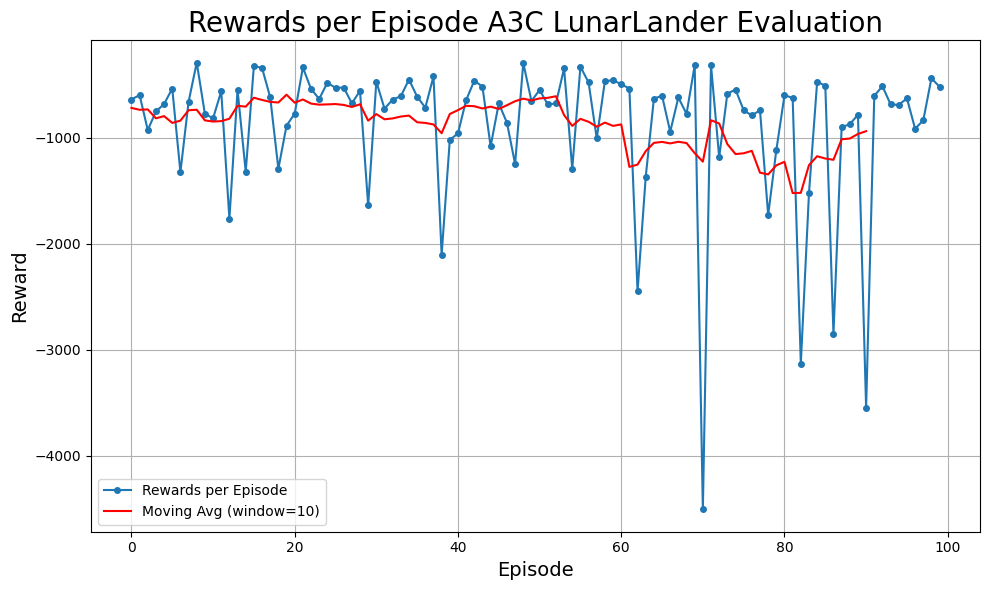

<module 'matplotlib.pyplot' from 'c:\\Users\\ASUS\\miniconda3\\envs\\new_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [8]:
from a3c_cartpole import greedy_agent_a3c


env_id = 'LunarLander'
model_path = f'a3c_models/a3c_model_{env_id}-v3.pth'
avg_reward, rewards_per_ep = greedy_agent_a3c(model_path, env_id)
print(f"Average Reward over {len(rewards_per_ep)} episodes: {avg_reward}")

print(rewards_per_ep)
# Plot results
rewards_per_episode_plot_2(rewards_per_ep, 'A3C LunarLander Evaluation')

## Mujoco Trials

In [ ]:
env = gym.make("BipedalWalker-v3", render_mode="human")

# Reset the environment to start a new episode
observation, info = env.reset()

for _ in range(1000):
    # The environment will render automatically since we set render_mode='human'
    
    # Take a random action
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        # Reset the environment if the episode is done
        observation, info = env.reset()

# Close the environment
env.close()

KeyboardInterrupt: 